In [11]:
import xarray as xr
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

# List all NetCDF files in the directory
file_list = glob.glob('/Users/bhupendra/projects/crocus/data/flux_data/data/netcdf/resnc/202410/*.nc')
file_list


['/Users/bhupendra/projects/crocus/data/flux_data/data/netcdf/resnc/202410/crocus-uic-smartflux-results-20241018T235959.nc',
 '/Users/bhupendra/projects/crocus/data/flux_data/data/netcdf/resnc/202410/crocus-uic-smartflux-results-20241001T235959.nc',
 '/Users/bhupendra/projects/crocus/data/flux_data/data/netcdf/resnc/202410/crocus-uic-smartflux-results-20241015T235959.nc',
 '/Users/bhupendra/projects/crocus/data/flux_data/data/netcdf/resnc/202410/crocus-uic-smartflux-results-20241020T235959.nc',
 '/Users/bhupendra/projects/crocus/data/flux_data/data/netcdf/resnc/202410/crocus-uic-smartflux-results-20241026T235959.nc',
 '/Users/bhupendra/projects/crocus/data/flux_data/data/netcdf/resnc/202410/crocus-uic-smartflux-results-20241007T235959.nc',
 '/Users/bhupendra/projects/crocus/data/flux_data/data/netcdf/resnc/202410/crocus-uic-smartflux-results-20241013T235959.nc',
 '/Users/bhupendra/projects/crocus/data/flux_data/data/netcdf/resnc/202410/crocus-uic-smartflux-results-20241019T235959.nc',


In [12]:

# Initialize empty lists to store data
x_peak_list = []
x_offset_list = []
x_10_list = []
x_30_list = []
x_50_list = []
x_70_list = []
x_90_list = []
wind_dir_list = []

# Loop over files and extract variables
for file in file_list:
    ds = xr.open_dataset(file)
    x_peak_list.append(ds['x_peak'].values)
    x_offset_list.append(ds['x_offset'].values)
    x_10_list.append(ds['x_10%'].values)
    x_30_list.append(ds['x_30%'].values)
    x_50_list.append(ds['x_50%'].values)
    x_70_list.append(ds['x_70%'].values)
    x_90_list.append(ds['x_90%'].values)
    wind_dir_list.append(ds['wind_dir'].values)  # Read wind direction variable
    ds.close()

# Concatenate data into single numpy arrays
x_peak = np.concatenate(x_peak_list)
x_offset = np.concatenate(x_offset_list)
x_10 = np.concatenate(x_10_list)
x_30 = np.concatenate(x_30_list)
x_50 = np.concatenate(x_50_list)
x_70 = np.concatenate(x_70_list)
x_90 = np.concatenate(x_90_list)
wind_dir = np.concatenate(wind_dir_list)

In [13]:
# Convert wind direction from degrees to radians
# Meteorological wind direction is given as the direction FROM which the wind is blowing
# Convert to direction TO which the wind is blowing for Cartesian coordinates

#wind_dir_to = (wind_dir + 180) % 360  # Wind direction TO which the wind is blowing

# Convert degrees to radians
wind_dir_rad = np.deg2rad(wind_dir)

In [14]:
# Function to compute x and y coordinates
def compute_xy(distance, angle_rad):
    x = distance * np.cos(angle_rad)
    y = distance * np.sin(angle_rad)
    return x, y

# Compute x and y coordinates for each cumulative percentage
x_10_x, x_10_y = compute_xy(x_10, wind_dir_rad)
x_30_x, x_30_y = compute_xy(x_30, wind_dir_rad)
x_50_x, x_50_y = compute_xy(x_50, wind_dir_rad)
x_70_x, x_70_y = compute_xy(x_70, wind_dir_rad)
x_90_x, x_90_y = compute_xy(x_90, wind_dir_rad)


In [15]:
# Create a DataFrame for ease of processing
data_xy = pd.DataFrame({
    'x_10_x': x_10_x,
    'x_10_y': x_10_y,
    'x_30_x': x_30_x,
    'x_30_y': x_30_y,
    'x_50_x': x_50_x,
    'x_50_y': x_50_y,
    'x_70_x': x_70_x,
    'x_70_y': x_70_y,
    'x_90_x': x_90_x,
    'x_90_y': x_90_y,
})

# Remove NaN values
data_xy = data_xy.dropna()

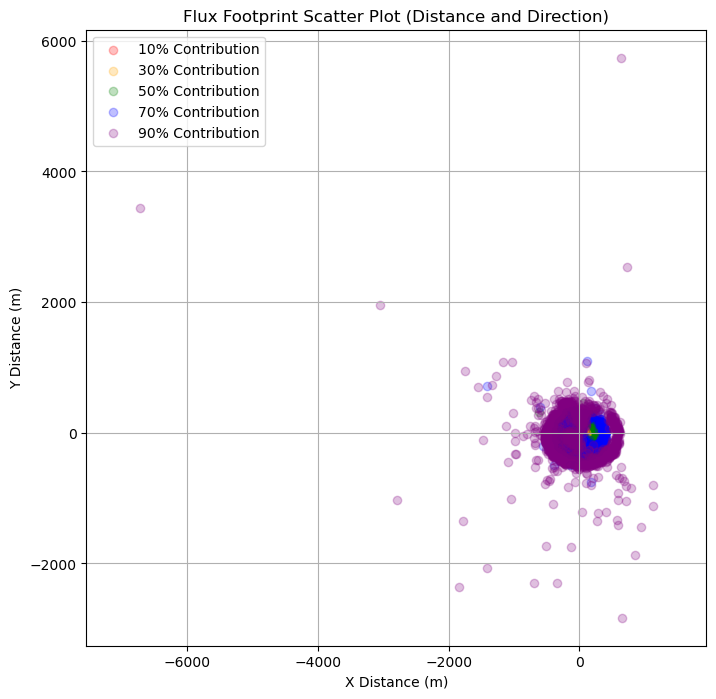

In [16]:
plt.figure(figsize=(8, 8))

# Plot settings
colors = ['red', 'orange', 'green', 'blue', 'purple']
percentages = ['10%', '30%', '50%', '70%', '90%']
x_vars = ['x_10_x', 'x_30_x', 'x_50_x', 'x_70_x', 'x_90_x']
y_vars = ['x_10_y', 'x_30_y', 'x_50_y', 'x_70_y', 'x_90_y']

for x_var, y_var, color, perc in zip(x_vars, y_vars, colors, percentages):
    plt.scatter(data_xy[x_var], data_xy[y_var], alpha=0.25, color=color, label=f'{perc} Contribution')

plt.title('Flux Footprint Scatter Plot (Distance and Direction)')
plt.xlabel('X Distance (m)')
plt.ylabel('Y Distance (m)')
plt.legend()
plt.axis('equal')  # Equal scaling on both axes
plt.grid(True)
plt.show()

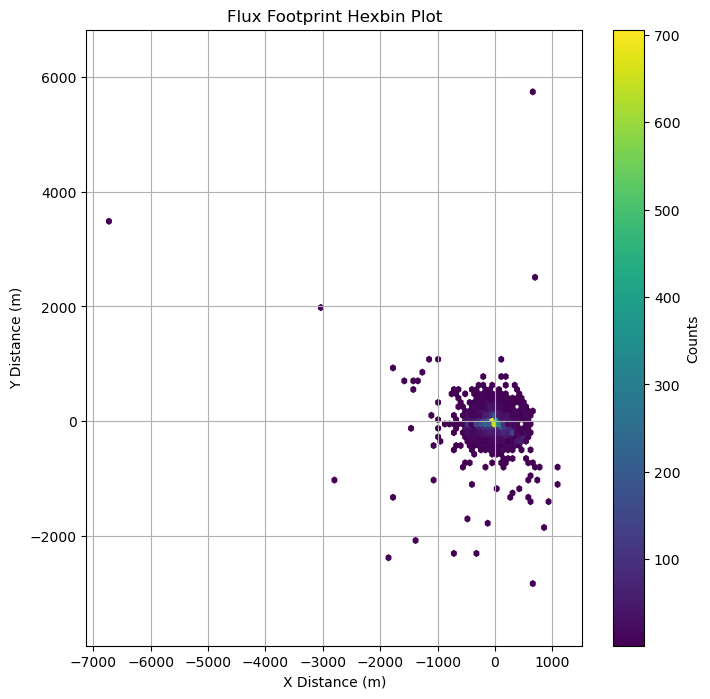

In [17]:
plt.figure(figsize=(8, 8))

# Combine all x and y coordinates
all_x = np.concatenate([data_xy[var] for var in x_vars])
all_y = np.concatenate([data_xy[var] for var in y_vars])

plt.hexbin(all_x, all_y, gridsize=100, cmap='viridis', mincnt=1)

plt.title('Flux Footprint Hexbin Plot')
plt.xlabel('X Distance (m)')
plt.ylabel('Y Distance (m)')
plt.colorbar(label='Counts')
plt.axis('equal')
plt.grid(True)
plt.show()

/var/folders/c0/hb5cyy892hqdjht868lw3qk80000gp/T/ipykernel_58052/601386385.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x=all_x, y=all_y, cmap="viridis", shade=True, bw_adjust=0.5)


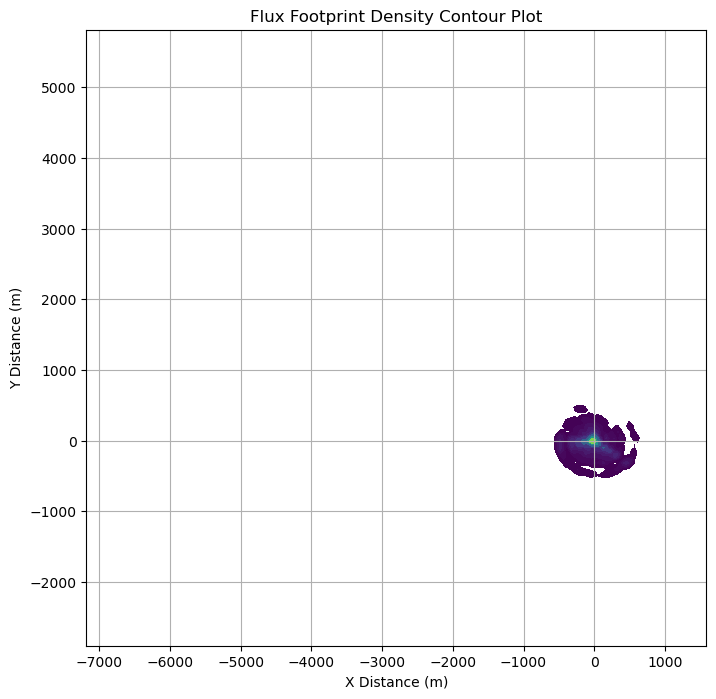

In [18]:
plt.figure(figsize=(8, 8))

sns.kdeplot(x=all_x, y=all_y, cmap="viridis", shade=True, bw_adjust=0.5)

plt.title('Flux Footprint Density Contour Plot')
plt.xlabel('X Distance (m)')
plt.ylabel('Y Distance (m)')
plt.axis('equal')
plt.grid(True)
plt.show()

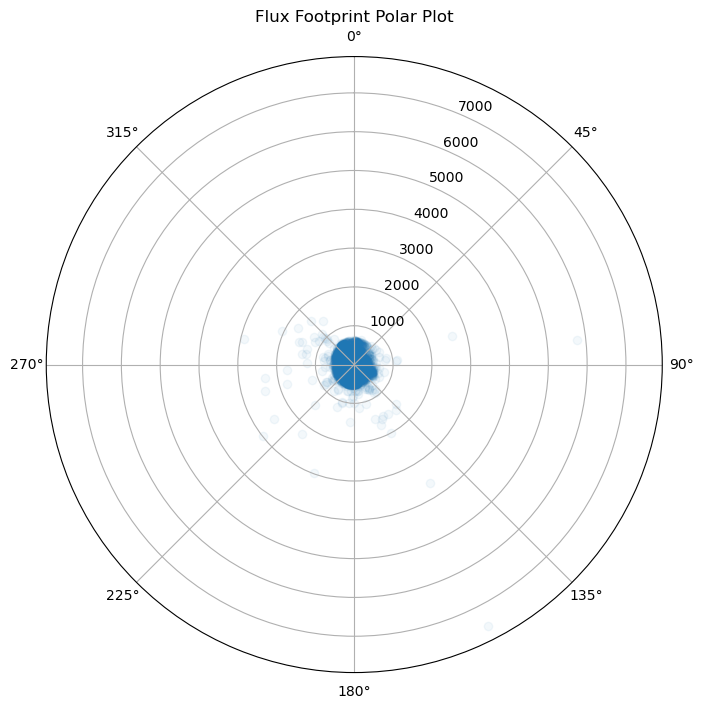

In [19]:
# Convert (x, y) to distances and angles for polar plot
distances = np.sqrt(all_x**2 + all_y**2)
angles = np.arctan2(all_y, all_x)

plt.figure(figsize=(8, 8))
ax = plt.subplot(111, polar=True)

# Create a scatter plot in polar coordinates
ax.scatter(angles, distances, alpha=0.05)

ax.set_theta_zero_location('N')  # Set 0 degrees at North
ax.set_theta_direction(-1)       # Set the direction of the angle increase (clockwise)

plt.title('Flux Footprint Polar Plot')
plt.show()

<Figure size 800x800 with 0 Axes>

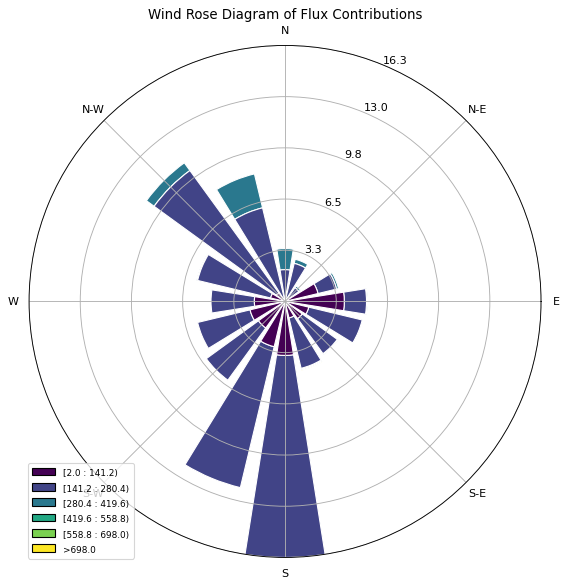

In [21]:
import windrose

# Install windrose if not already installed
# pip install windrose

from windrose import WindroseAxes

# Prepare data
# Use wind direction FROM which wind is blowing (original meteorological wind direction)
distance = x_50  # Choose a representative distance variable

plt.figure(figsize=(8, 8))
ax = WindroseAxes.from_ax()
ax.bar(wind_dir, distance, normed=True, opening=0.8, edgecolor='white')
ax.set_title('Wind Rose Diagram of Flux Contributions')
ax.set_legend()
plt.show()

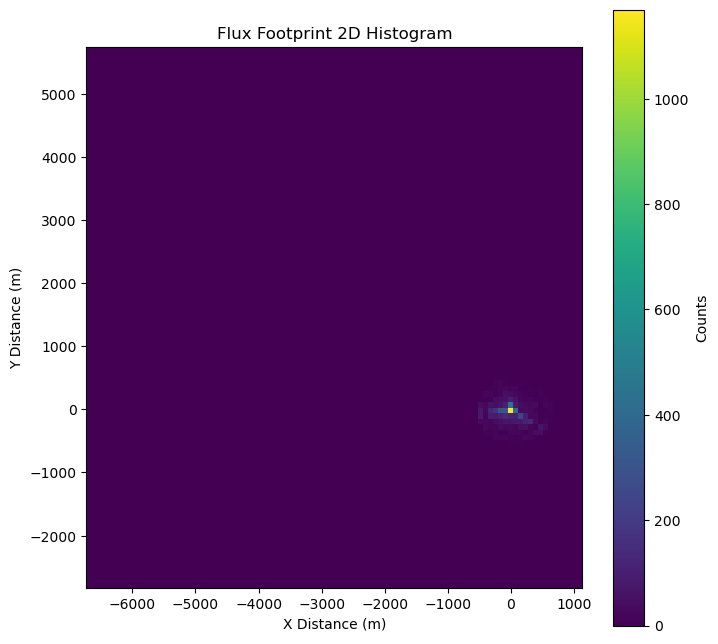

In [22]:
# Create 2D histogram bins
x_bins = np.linspace(np.min(all_x), np.max(all_x), 100)
y_bins = np.linspace(np.min(all_y), np.max(all_y), 100)

hist, xedges, yedges = np.histogram2d(all_x, all_y, bins=[x_bins, y_bins])

# Plot heatmap
plt.figure(figsize=(8, 8))
plt.imshow(hist.T, origin='lower', cmap='viridis',
           extent=[xedges[0], xedges[-1], yedges[0], yedges[-1]],
           aspect='equal')

plt.colorbar(label='Counts')
plt.title('Flux Footprint 2D Histogram')
plt.xlabel('X Distance (m)')
plt.ylabel('Y Distance (m)')
plt.grid(False)
plt.show()


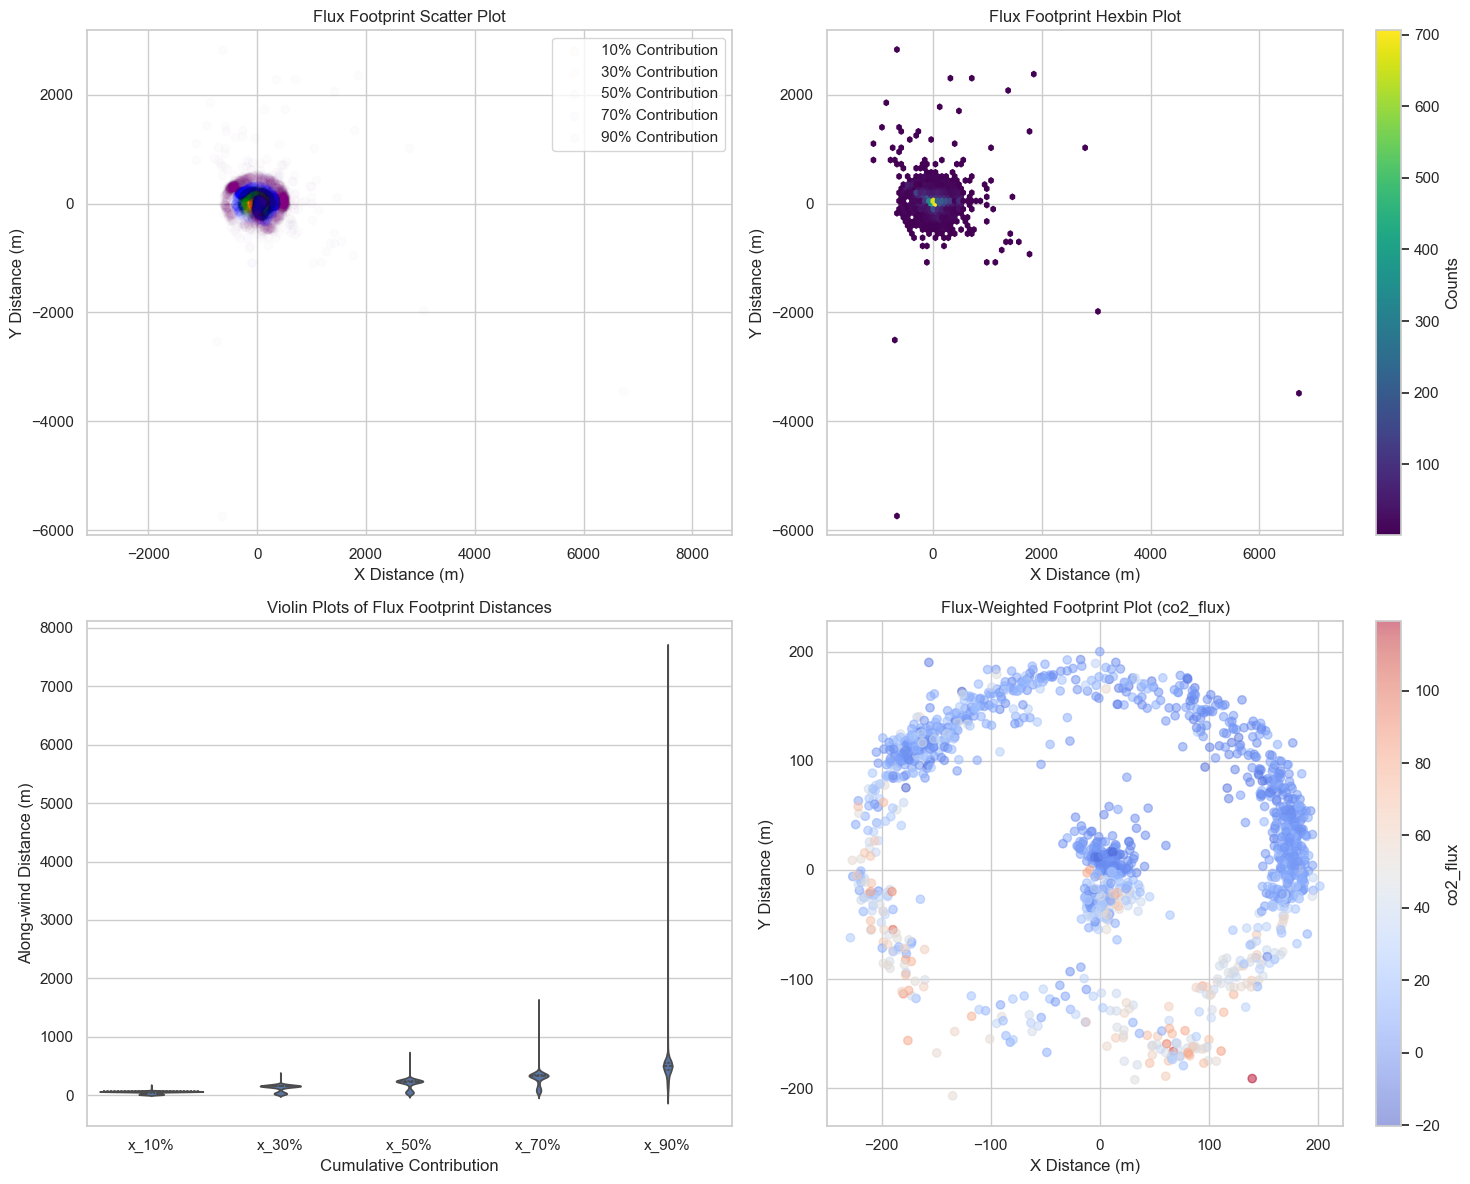

In [23]:
import xarray as xr
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

def plot_flux_footprints(netCDF_path_pattern, flux_variable='co2_flux'):
    """
    Reads NetCDF files, processes flux footprint data including a specified flux variable,
    and generates panel plots showing the flux footprints.

    Parameters:
    - netCDF_path_pattern (str): File path pattern to NetCDF files (e.g., 'data/*.nc')
    - flux_variable (str): Name of the flux variable to use (e.g., 'co2_flux', 'h2o_flux')
    """

    # List all NetCDF files matching the pattern
    file_list = glob.glob(netCDF_path_pattern)

    # Initialize lists to store data
    x_distance_vars = ['x_peak', 'x_offset', 'x_10%', 'x_30%', 'x_50%', 'x_70%', 'x_90%']
    x_distance_data = {var: [] for var in x_distance_vars}
    wind_dir_list = []
    flux_list = []

    # Loop over files and extract variables
    for file in file_list:
        ds = xr.open_dataset(file)

        # Extract distance variables
        for var in x_distance_vars:
            if var in ds.variables:
                x_distance_data[var].append(ds[var].values)
            else:
                print(f"Variable '{var}' not found in {file}.")
                x_distance_data[var].append(np.full(ds.dims['time'], np.nan))

        # Extract wind direction
        if 'wind_dir' in ds.variables:
            wind_dir_list.append(ds['wind_dir'].values)
        else:
            print(f"Variable 'wind_dir' not found in {file}.")
            wind_dir_list.append(np.full(ds.dims['time'], np.nan))

        # Extract flux variable
        if flux_variable in ds.variables:
            flux_list.append(ds[flux_variable].values)
        else:
            print(f"Variable '{flux_variable}' not found in {file}.")
            flux_list.append(np.full(ds.dims['time'], np.nan))

        ds.close()

    # Concatenate data into single numpy arrays
    data = {}
    for var in x_distance_vars:
        data[var] = np.concatenate(x_distance_data[var])

    wind_dir = np.concatenate(wind_dir_list)
    flux_data = np.concatenate(flux_list)

    # Remove NaN values and create a DataFrame
    df = pd.DataFrame(data)
    df['wind_dir'] = wind_dir
    df[flux_variable] = flux_data
    df = df.dropna()

    # Convert wind direction to radians (from direction TO which wind is blowing)
    wind_dir_to = (df['wind_dir'] + 180) % 360  # Convert FROM to TO direction
    wind_dir_rad = np.deg2rad(wind_dir_to)

    # Function to compute x and y coordinates
    def compute_xy(distance):
        x = distance * np.cos(wind_dir_rad)
        y = distance * np.sin(wind_dir_rad)
        return x, y

    # Compute x and y coordinates for each cumulative percentage
    for var in x_distance_vars:
        x_var = var + '_x'
        y_var = var + '_y'
        df[x_var], df[y_var] = compute_xy(df[var])

    # Weight coordinates by flux
    df['flux_weight'] = df[flux_variable]

    # Begin plotting
    sns.set(style='whitegrid')
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))

    # Panel 1: Scatter Plot with Transparency
    ax = axs[0,0]
    percentages = ['10%', '30%', '50%', '70%', '90%']
    colors = ['red', 'orange', 'green', 'blue', 'purple']
    for perc, color in zip(percentages, colors):
        x_var = f'x_{perc}_x'
        y_var = f'x_{perc}_y'
        ax.scatter(df[x_var], df[y_var], alpha=0.01, color=color, label=f'{perc} Contribution')
    ax.set_title('Flux Footprint Scatter Plot')
    ax.set_xlabel('X Distance (m)')
    ax.set_ylabel('Y Distance (m)')
    ax.legend()
    ax.axis('equal')
    ax.grid(True)

    # Panel 2: Hexbin Plot
    ax = axs[0,1]
    all_x = np.concatenate([df[f'x_{perc}_x'] for perc in percentages])
    all_y = np.concatenate([df[f'x_{perc}_y'] for perc in percentages])
    hb = ax.hexbin(all_x, all_y, gridsize=100, cmap='viridis', mincnt=1)
    ax.set_title('Flux Footprint Hexbin Plot')
    ax.set_xlabel('X Distance (m)')
    ax.set_ylabel('Y Distance (m)')
    ax.axis('equal')
    fig.colorbar(hb, ax=ax, label='Counts')

    # Panel 3: Violin Plot of Distances
    ax = axs[1,0]
    melted_df = df.melt(value_vars=['x_10%', 'x_30%', 'x_50%', 'x_70%', 'x_90%'],
                        var_name='Cumulative %', value_name='Distance')
    sns.violinplot(x='Cumulative %', y='Distance', data=melted_df, inner='quartile', ax=ax)
    ax.set_title('Violin Plots of Flux Footprint Distances')
    ax.set_xlabel('Cumulative Contribution')
    ax.set_ylabel('Along-wind Distance (m)')

    # Panel 4: Flux-Weighted Footprint Plot
    ax = axs[1,1]
    # Multiply coordinates by flux to get flux-weighted positions
    # Use absolute value of flux for weighting
    flux_weighted_x = df['x_peak_x'] * df['flux_weight']
    flux_weighted_y = df['x_peak_y'] * df['flux_weight']
    # Normalize weights for plotting
    norm = plt.Normalize(df['flux_weight'].min(), df['flux_weight'].max())
    sc = ax.scatter(df['x_peak_x'], df['x_peak_y'], c=df['flux_weight'], cmap='coolwarm', alpha=0.5, norm=norm)
    ax.set_title(f'Flux-Weighted Footprint Plot ({flux_variable})')
    ax.set_xlabel('X Distance (m)')
    ax.set_ylabel('Y Distance (m)')
    ax.axis('equal')
    fig.colorbar(sc, ax=ax, label=f'{flux_variable}')

    plt.tight_layout()
    plt.show()

# Example usage:
plot_flux_footprints('/Users/bhupendra/projects/crocus/data/flux_data/data/netcdf/resnc/202410/*.nc', flux_variable='co2_flux')


Analyzing co2_flux...



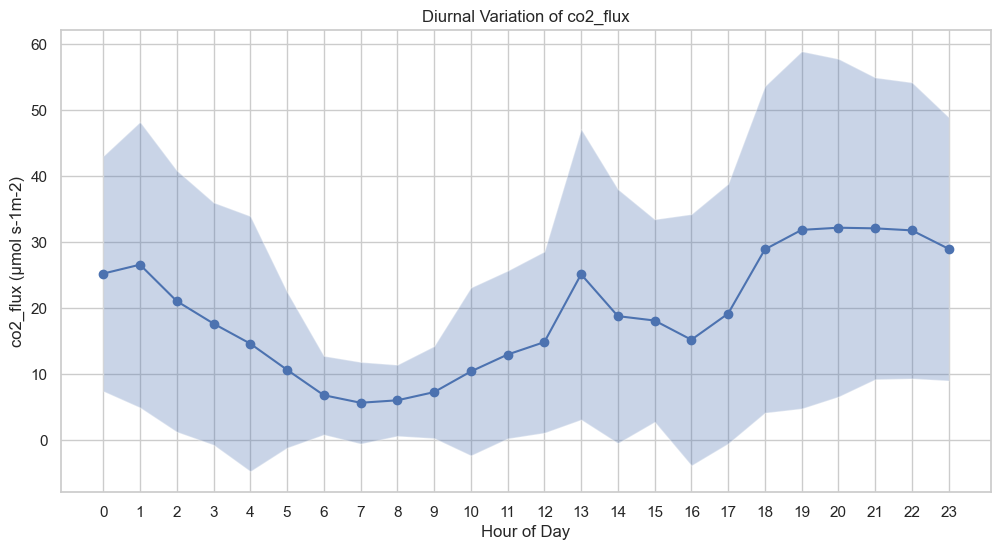

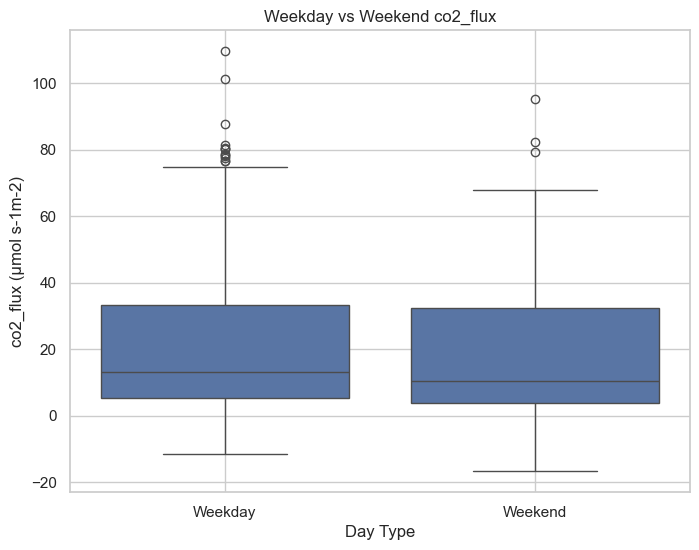

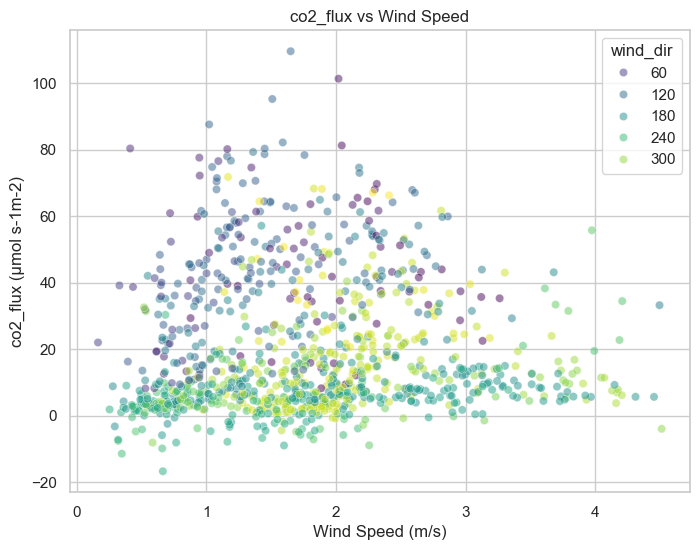

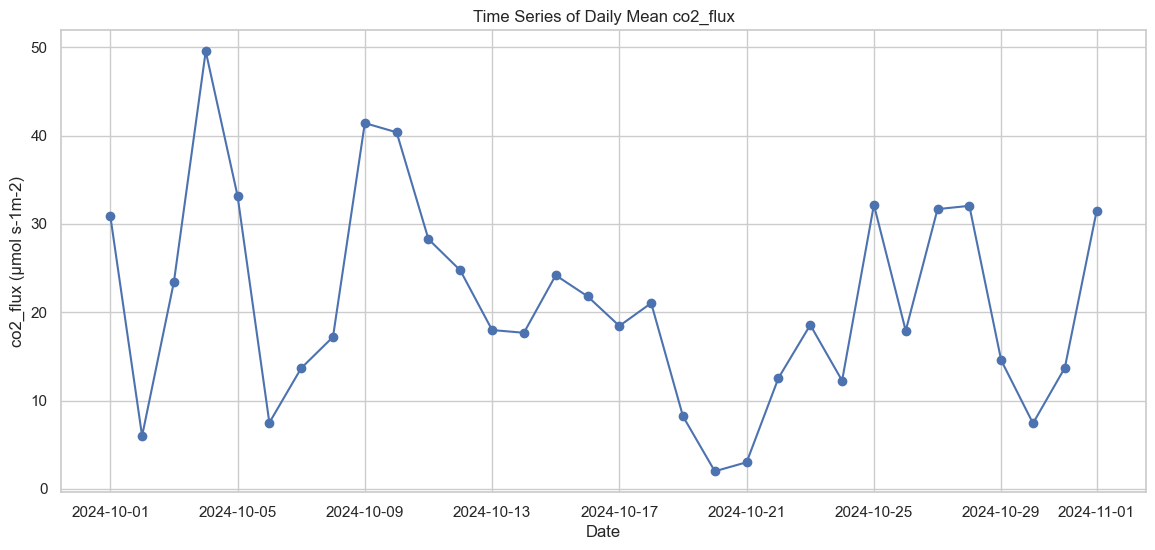

<Figure size 800x800 with 0 Axes>

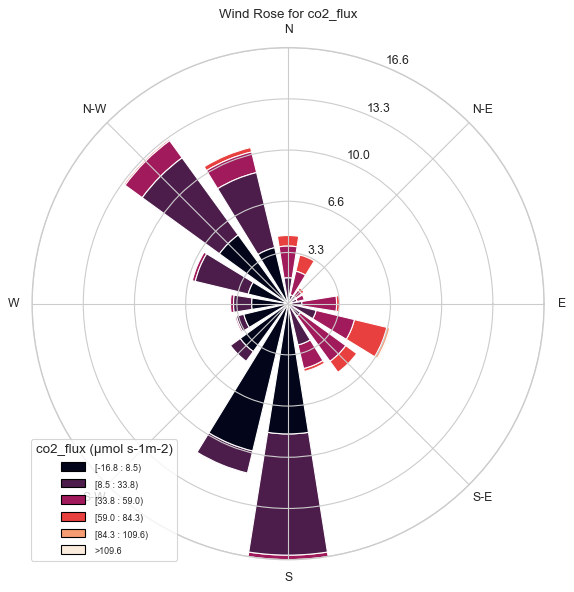


Analyzing h2o_flux...



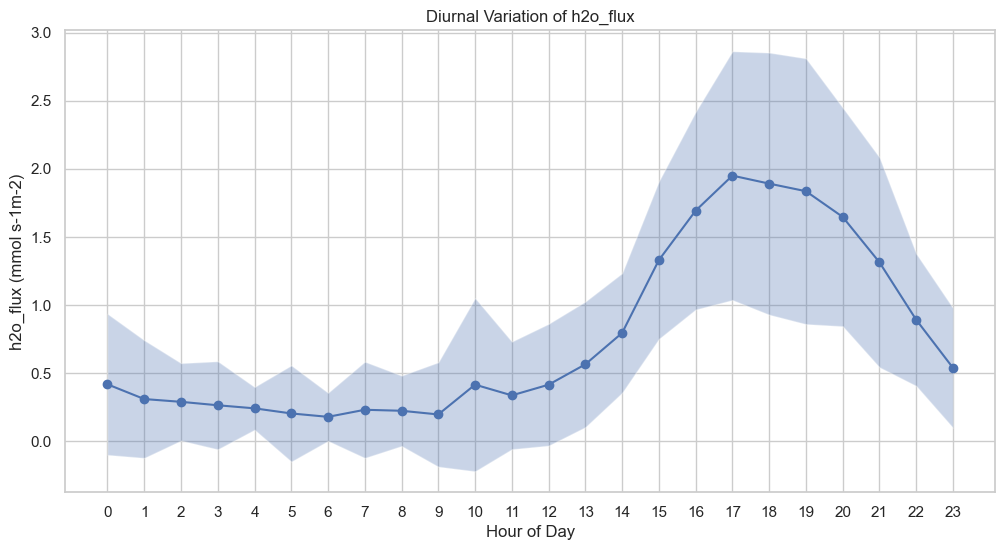

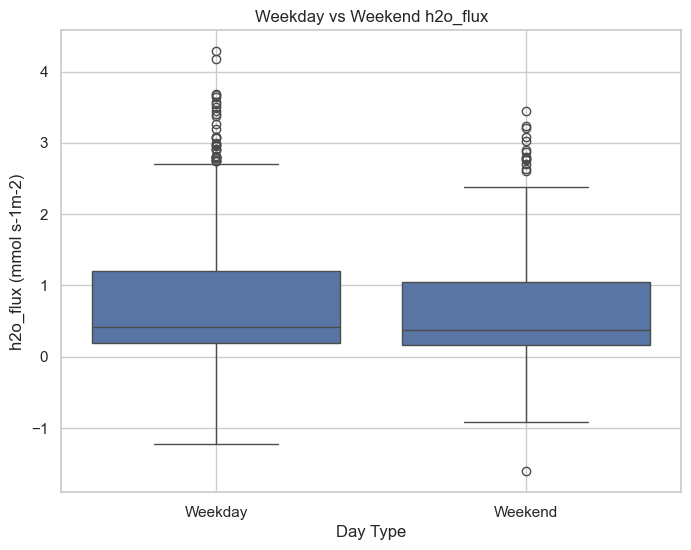

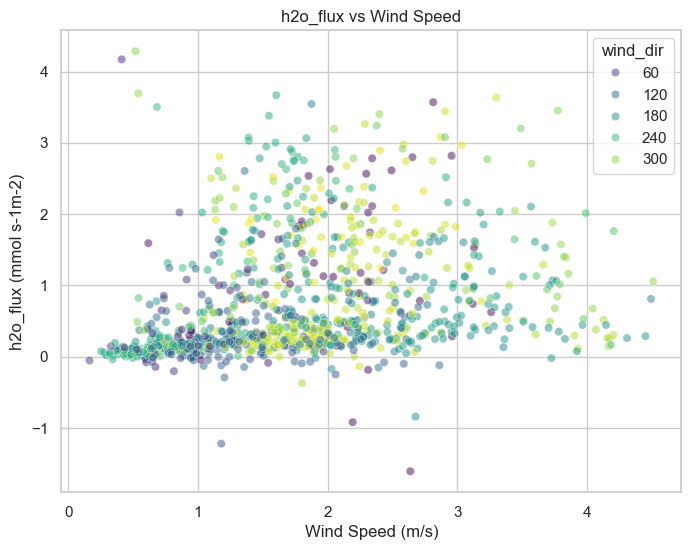

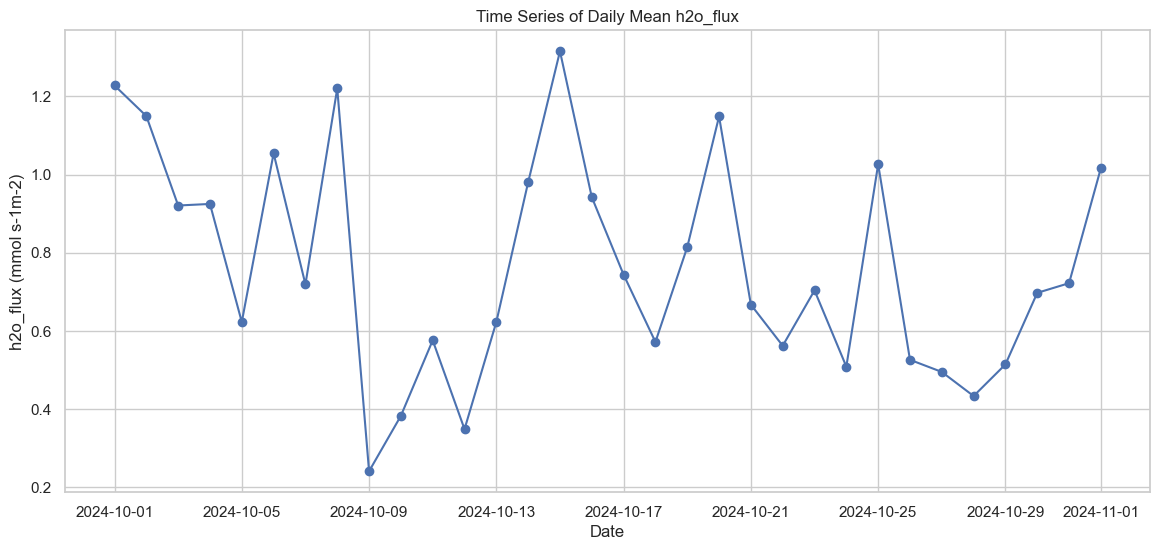

<Figure size 800x800 with 0 Axes>

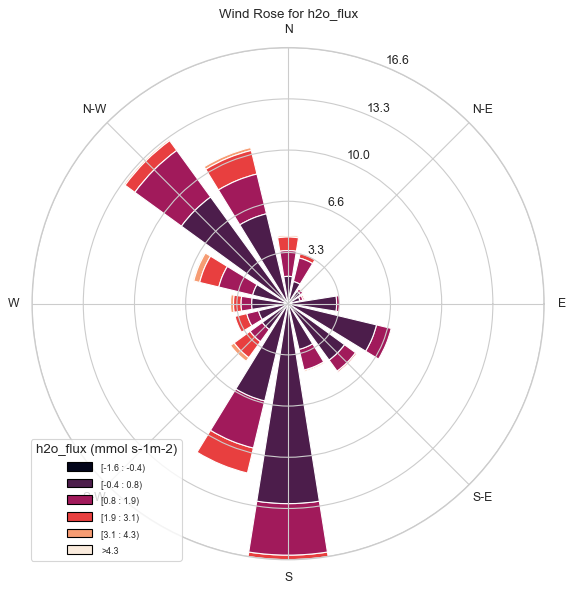


Analyzing H...



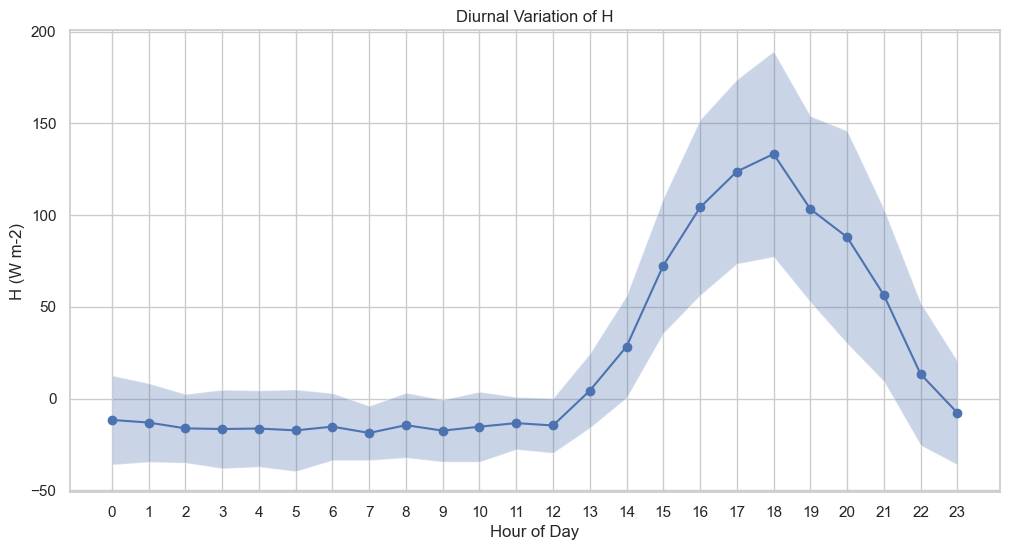

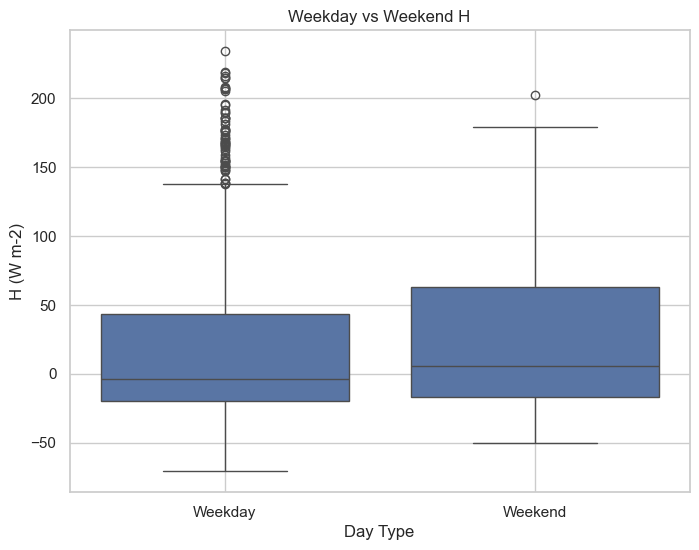

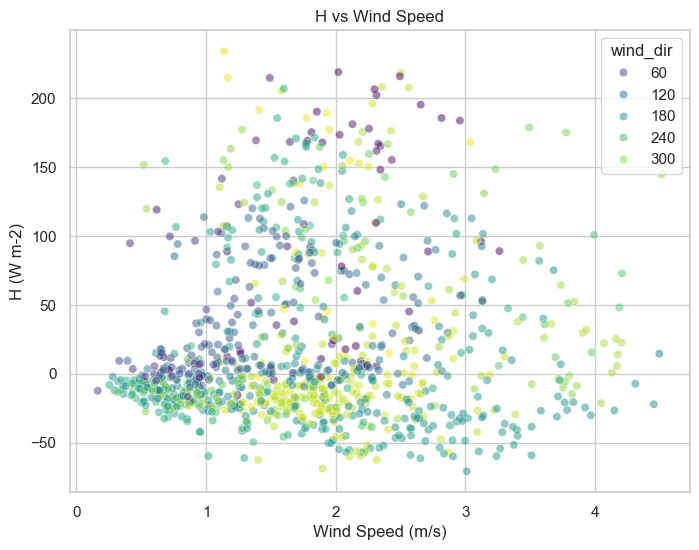

<Figure size 800x800 with 0 Axes>

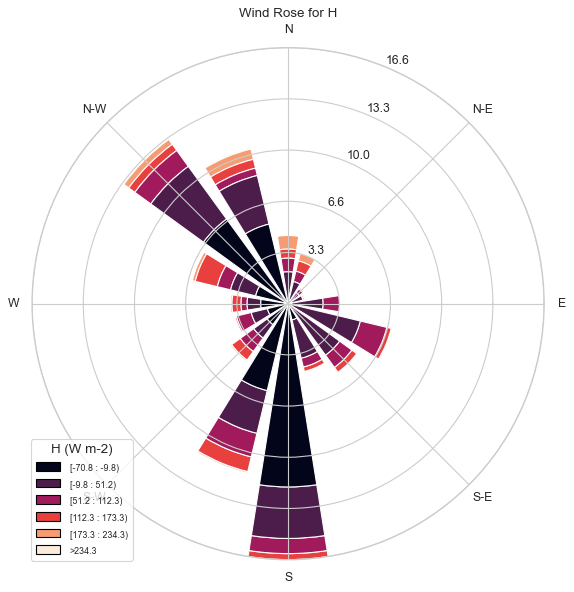


Analyzing LE...



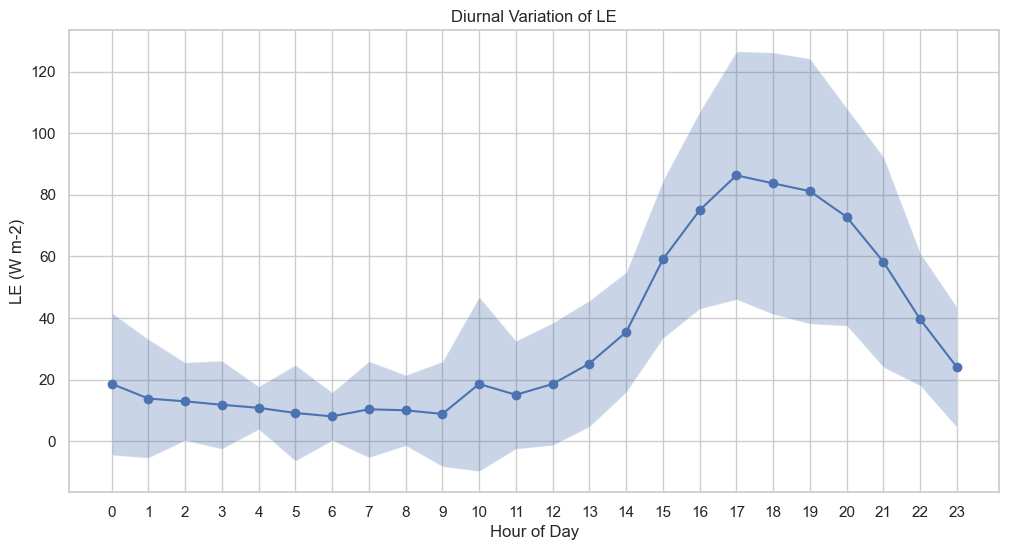

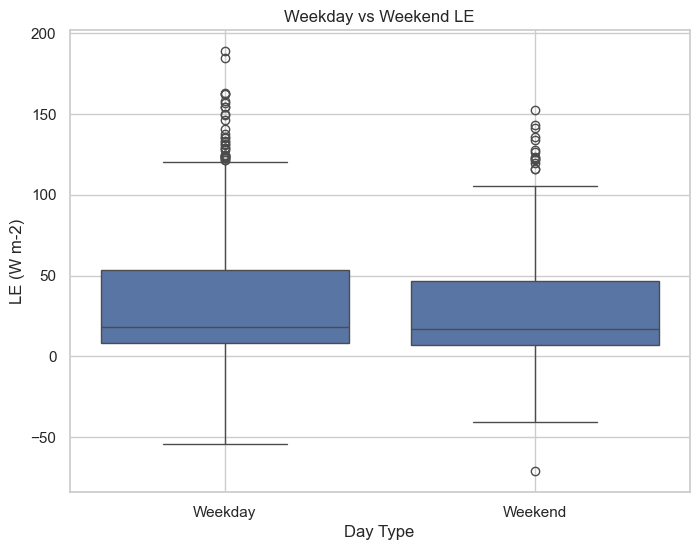

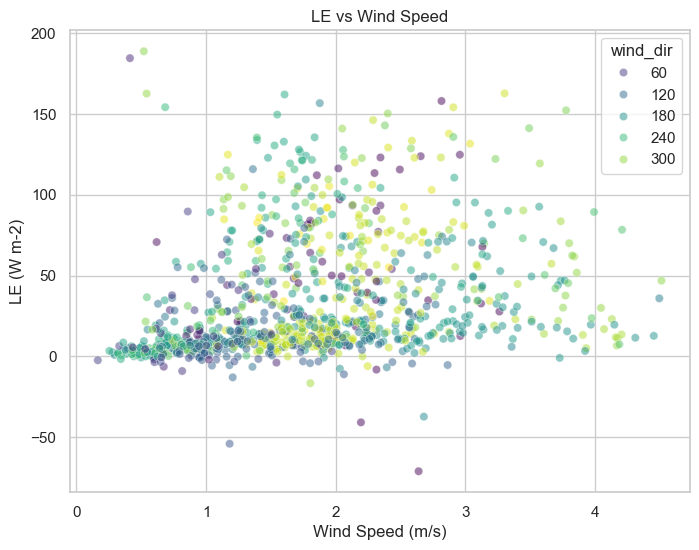

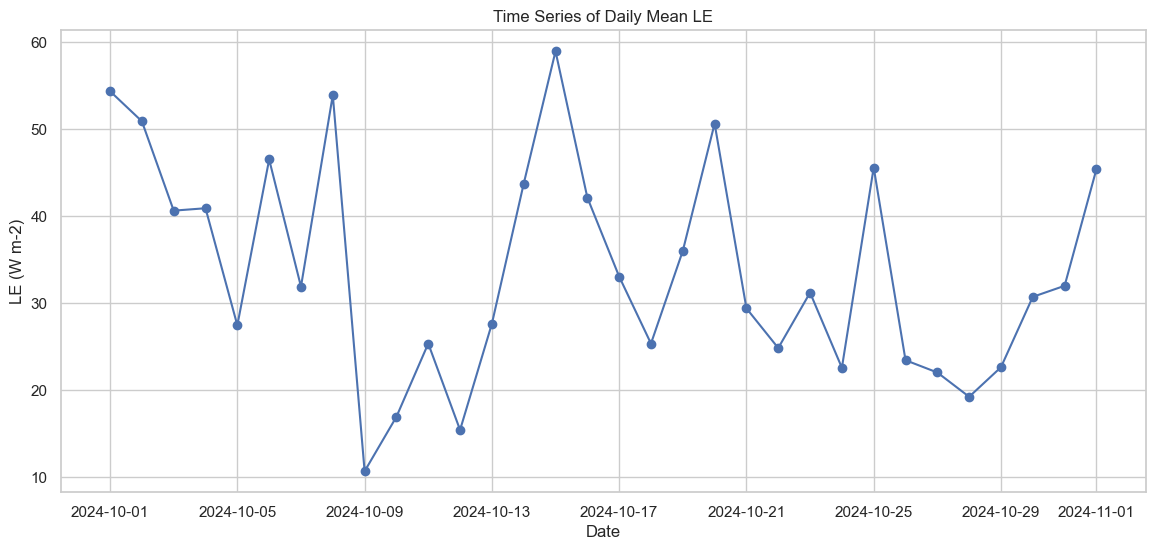

<Figure size 800x800 with 0 Axes>

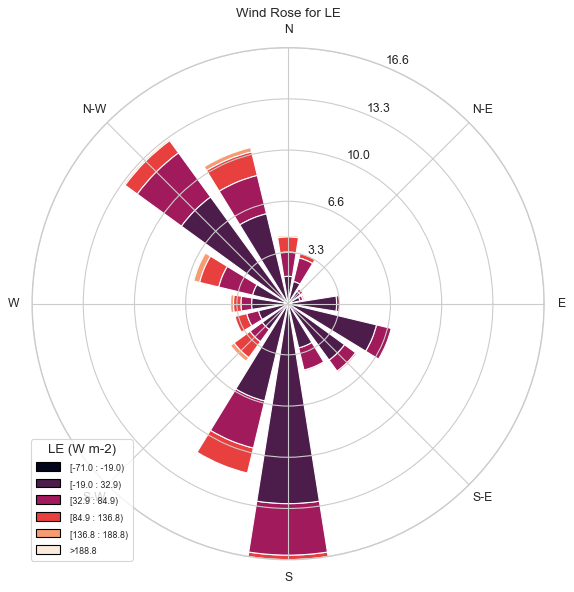

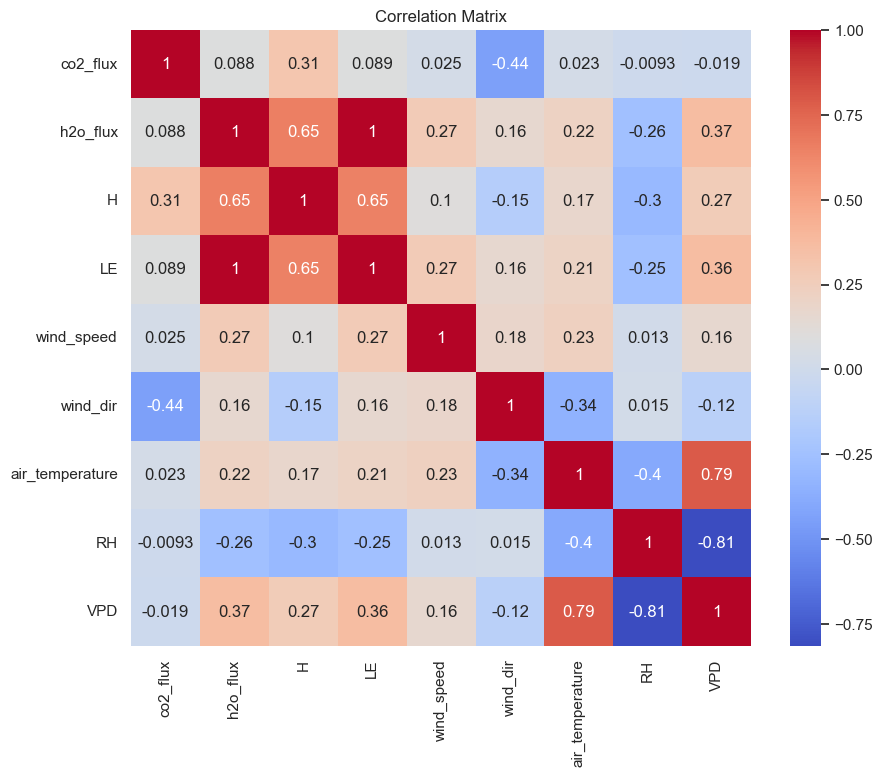

In [24]:
# Import necessary libraries
import xarray as xr
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from windrose import WindroseAxes
import datetime



var_metadata = {
    "filename": {
        "long_name": "file name",
        "units": "",
        "description": "Name of the file",
    },
    "date": {
        "long_name": "date",
        "units": "yyyy-mm-dd",
        "description": "Date of the measurement",
    },
    "time": {
        "long_name": "time",
        "units": "HH:MM",
        "description": "Time of the measurement",
    },
    "DOY": {
        "long_name": "day of year",
        "units": "ddd.ddd",
        "description": "Day of the year",
    },
    "daytime": {
        "long_name": "daytime flag",
        "units": "1=daytime",
        "description": "Daytime flag (1=daytime)",
    },
    "file_records": {
        "long_name": "file records",
        "units": "#",
        "description": "Number of records in the file",
    },
    "used_records": {
        "long_name": "used records",
        "units": "#",
        "description": "Number of records used",
    },
    "Tau": {
        "long_name": "momentum flux",
        "units": "kg m-1s-2",
        "description": "Momentum flux",
    },
    "qc_Tau": {
        "long_name": "quality control momentum flux",
        "units": "#",
        "description": "Quality control for momentum flux",
    },
    "rand_err_Tau": {
        "long_name": "random error momentum flux",
        "units": "kg m-1s-2",
        "description": "Random error in momentum flux",
    },
    "H": {
        "long_name": "sensible heat flux",
        "units": "W m-2",
        "description": "Sensible heat flux",
    },
    "qc_H": {
        "long_name": "quality control sensible heat flux",
        "units": "#",
        "description": "Quality control for sensible heat flux",
    },
    "rand_err_H": {
        "long_name": "random error sensible heat flux",
        "units": "W m-2",
        "description": "Random error in sensible heat flux",
    },
    "LE": {
        "long_name": "latent heat flux",
        "units": "W m-2",
        "description": "Latent heat flux",
    },
    "qc_LE": {
        "long_name": "quality control latent heat flux",
        "units": "#",
        "description": "Quality control for latent heat flux",
    },
    "rand_err_LE": {
        "long_name": "random error latent heat flux",
        "units": "W m-2",
        "description": "Random error in latent heat flux",
    },
    "co2_flux": {
        "long_name": "CO2 flux",
        "units": "µmol s-1m-2",
        "description": "CO2 flux",
    },
    "qc_co2_flux": {
        "long_name": "quality control CO2 flux",
        "units": "#",
        "description": "Quality control for CO2 flux",
    },
    "rand_err_co2_flux": {
        "long_name": "random error CO2 flux",
        "units": "µmol s-1m-2",
        "description": "Random error in CO2 flux",
    },
    "h2o_flux": {
        "long_name": "H2O flux",
        "units": "mmol s-1m-2",
        "description": "H2O flux",
    },
    "qc_h2o_flux": {
        "long_name": "quality control H2O flux",
        "units": "#",
        "description": "Quality control for H2O flux",
    },
    "rand_err_h2o_flux": {
        "long_name": "random error H2O flux",
        "units": "mmol s-1m-2",
        "description": "Random error in H2O flux",
    },
    "ch4_flux": {
        "long_name": "CH4 flux",
        "units": "µmol s-1m-2",
        "description": "CH4 flux",
    },
    "qc_ch4_flux": {
        "long_name": "quality control CH4 flux",
        "units": "#",
        "description": "Quality control for CH4 flux",
    },
    "rand_err_ch4_flux": {
        "long_name": "random error CH4 flux",
        "units": "µmol s-1m-2",
        "description": "Random error in CH4 flux",
    },
    "none_flux": {
        "long_name": "none flux",
        "units": "µmol s-1m-2",
        "description": "None flux",
    },
    "qc_none_flux": {
        "long_name": "quality control none flux",
        "units": "#",
        "description": "Quality control for None flux",
    },
    "rand_err_none_flux": {
        "long_name": "random error none flux",
        "units": "µmol s-1m-2",
        "description": "Random error in None flux",
    },
    "H_strg": {
        "long_name": "sensible heat storage",
        "units": "W m-2",
        "description": "Sensible heat storage",
    },
    "LE_strg": {
        "long_name": "latent heat storage",
        "units": "W m-2",
        "description": "Latent heat storage",
    },
    "co2_strg": {
        "long_name": "CO2 storage",
        "units": "µmol s-1m-2",
        "description": "CO2 storage",
    },
    "h2o_strg": {
        "long_name": "H2O storage",
        "units": "mmol s-1m-2",
        "description": "H2O storage",
    },
    "ch4_strg": {
        "long_name": "CH4 storage",
        "units": "µmol s-1m-2",
        "description": "CH4 storage",
    },
    "none_strg": {
        "long_name": "none storage",
        "units": "µmol s-1m-2",
        "description": "None storage",
    },
    "co2_vadv": {
        "long_name": "CO2 vertical advection",
        "units": "µmol s-1m-2",
        "description": "CO2 vertical advection",
    },
    "h2o_vadv": {
        "long_name": "H2O vertical advection",
        "units": "mmol s-1m-2",
        "description": "H2O vertical advection",
    },
    "ch4_vadv": {
        "long_name": "CH4 vertical advection",
        "units": "µmol s-1m-2",
        "description": "CH4 vertical advection",
    },
    "none_vadv": {
        "long_name": "none vertical advection",
        "units": "µmol s-1m-2",
        "description": "None vertical advection",
    },
    "co2_molar_density": {
        "long_name": "CO2 molar density",
        "units": "mmol m-3",
        "description": "CO2 molar density",
    },
    "co2_mole_fraction": {
        "long_name": "CO2 mole fraction",
        "units": "µmol mol_a-1",
        "description": "CO2 mole fraction",
    },
    "co2_mixing_ratio": {
        "long_name": "CO2 mixing ratio",
        "units": "µmol mol_d-1",
        "description": "CO2 mixing ratio",
    },
    "co2_time_lag": {
        "long_name": "CO2 time lag",
        "units": "s",
        "description": "CO2 time lag",
    },
    "co2_def_timelag": {
        "long_name": "CO2 default time lag",
        "units": "1=default",
        "description": "CO2 default time lag flag",
    },
    "h2o_molar_density": {
        "long_name": "H2O molar density",
        "units": "mmol m-3",
        "description": "H2O molar density",
    },
    "h2o_mole_fraction": {
        "long_name": "H2O mole fraction",
        "units": "mmol mol_a-1",
        "description": "H2O mole fraction",
    },
    "h2o_mixing_ratio": {
        "long_name": "H2O mixing ratio",
        "units": "mmol mol_d-1",
        "description": "H2O mixing ratio",
    },
    "h2o_time_lag": {
        "long_name": "H2O time lag",
        "units": "s",
        "description": "H2O time lag",
    },
    "h2o_def_timelag": {
        "long_name": "H2O default time lag",
        "units": "1=default",
        "description": "H2O default time lag flag",
    },
    "ch4_molar_density": {
        "long_name": "CH4 molar density",
        "units": "mmol m-3",
        "description": "CH4 molar density",
    },
    "ch4_mole_fraction": {
        "long_name": "CH4 mole fraction",
        "units": "µmol mol_a-1",
        "description": "CH4 mole fraction",
    },
    "ch4_mixing_ratio": {
        "long_name": "CH4 mixing ratio",
        "units": "µmol mol_d-1",
        "description": "CH4 mixing ratio",
    },
    "ch4_time_lag": {
        "long_name": "CH4 time lag",
        "units": "s",
        "description": "CH4 time lag",
    },
    "ch4_def_timelag": {
        "long_name": "CH4 default time lag",
        "units": "1=default",
        "description": "CH4 default time lag flag",
    },
    "none_molar_density": {
        "long_name": "none molar density",
        "units": "mmol m-3",
        "description": "None molar density",
    },
    "none_mole_fraction": {
        "long_name": "none mole fraction",
        "units": "µmol mol_a-1",
        "description": "None mole fraction",
    },
    "none_mixing_ratio": {
        "long_name": "none mixing ratio",
        "units": "µmol mol_d-1",
        "description": "None mixing ratio",
    },
    "none_time_lag": {
        "long_name": "none time lag",
        "units": "s",
        "description": "None time lag",
    },
    "none_def_timelag": {
        "long_name": "none default time lag",
        "units": "1=default",
        "description": "None default time lag flag",
    },
    "sonic_temperature": {
        "long_name": "sonic temperature",
        "units": "K",
        "description": "Sonic temperature",
    },
    "air_temperature": {
        "long_name": "air temperature",
        "units": "K",
        "description": "Air temperature",
    },
    "air_pressure": {
        "long_name": "air pressure",
        "units": "Pa",
        "description": "Mean pressure of ambient air",
    },
    "air_density": {
        "long_name": "air density",
        "units": "kg m-3",
        "description": "Density of ambient air",
    },
    "air_heat_capacity": {
        "long_name": "air heat capacity",
        "units": "J kg-1K-1",
        "description": "Specific heat at constant pressure of ambient air",
    },
    "air_molar_volume": {
        "long_name": "air molar volume",
        "units": "m+3mol-1",
        "description": "Air molar volume",
    },
    "ET": {
        "long_name": "evapotranspiration",
        "units": "mm hour-1",
        "description": "Evapotranspiration Flux",
    },
    "water_vapor_density": {
        "long_name": "water vapor density",
        "units": "kg m-3",
        "description": "Water vapor density",
    },
    "e": {
        "long_name": "vapor pressure",
        "units": "Pa",
        "description": "Vapor pressure",
    },
    "es": {
        "long_name": "saturation vapor pressure",
        "units": "Pa",
        "description": "Saturation vapor pressure",
    },
    "specific_humidity": {
        "long_name": "specific humidity",
        "units": "kg kg-1",
        "description": "Ambient specific humidity on a mass basis",
    },
    "RH": {
        "long_name": "relative humidity",
        "units": "%",
        "description": "Relative humidity",
    },
    "VPD": {
        "long_name": "vapor pressure deficit",
        "units": "Pa",
        "description": "Vapor pressure deficit",
    },
    "Tdew": {
        "long_name": "dew point temperature",
        "units": "K",
        "description": "Dew point temperature",
    },
    "u_unrot": {
        "long_name": "unrotated u wind component",
        "units": "m s-1",
        "description": "Wind component along the u anemometer axis",
    },
    "v_unrot": {
        "long_name": "unrotated v wind component",
        "units": "m s-1",
        "description": "Wind component along the v anemometer axis",
    },
    "w_unrot": {
        "long_name": "unrotated w wind component",
        "units": "m s-1",
        "description": "Wind component along the w anemometer axis",
    },
    "u_rot": {
        "long_name": "rotated u wind component",
        "units": "m s-1",
        "description": "Rotated u wind component (mean wind speed)",
    },
    "v_rot": {
        "long_name": "rotated v wind component",
        "units": "m s-1",
        "description": "Rotated v wind component (should be zero)",
    },
    "w_rot": {
        "long_name": "rotated w wind component",
        "units": "m s-1",
        "description": "Rotated w wind component (should be zero)",
    },
    "wind_speed": {
        "long_name": "wind speed",
        "units": "m s-1",
        "description": "Mean Wind speed",
    },
    "max_wind_speed": {
        "long_name": "maximum wind speed",
        "units": "m s-1",
        "description": "Maximum instantaneous wind speed",
    },
    "wind_dir": {
        "long_name": "wind direction",
        "units": "deg from north",
        "description": "Direction from which the wind blows, with respect to Geographic or Magnetic north",
    },
    "yaw": {"long_name": "yaw", "units": "deg", "description": "Yaw"},
    "pitch": {"long_name": "pitch", "units": "deg", "description": "Pitch"},
    "roll": {"long_name": "roll", "units": "deg", "description": "Roll"},
    "u*": {
        "long_name": "friction velocity",
        "units": "m s-1",
        "description": "Friction velocity",
    },
    "TKE": {
        "long_name": "turbulent kinetic energy",
        "units": "m+2s-2",
        "description": "Turbulent kinetic energy",
    },
    "L": {"long_name": "Monin-Obukhov length", "units": "m", "description": "Monin-Obukhov length"},
    "z_d_per_L": {
        "long_name": "stability parameter",
        "units": "#",
        "description": "Monin-Obukhov Stability parameter",
    },
    "bowen_ratio": {
        "long_name": "Bowen ratio",
        "units": "#",
        "description": "Bowen ratio",
    },
    "T*": {
        "long_name": "temperature scale",
        "units": "K",
        "description": "Temperature scale",
    },
    "model": {"long_name": "model", "units": "0=KJ/1=KM/2=HS", "description": "Model"},
    "x_peak": {"long_name": "x peak", "units": "m", "description": "Along-wind distance providing the highest (peak) contribution to turbulent fluxes"},
    "x_offset": {"long_name": "x offset", "units": "m", "description": "Along-wind distance providing <1% contribution to turbulent fluxes"},
    "x_10%": {"long_name": "x 10%", "units": "m", "description": "Along-wind distance providing 10% (cumulative) contribution to turbulent fluxes"},
    "x_30%": {"long_name": "x 30%", "units": "m", "description": "Along-wind distance providing 30% (cumulative) contribution to turbulent fluxes"},
    "x_50%": {"long_name": "x 50%", "units": "m", "description": "Along-wind distance providing 50% (cumulative) contribution to turbulent fluxes"},
    "x_70%": {"long_name": "x 70%", "units": "m", "description": "Along-wind distance providing 70% (cumulative) contribution to turbulent fluxes"},
    "x_90%": {"long_name": "x 90%", "units": "m", "description": "Along-wind distance providing 90% (cumulative) contribution to turbulent fluxes"},
    "un_Tau": {
        "long_name": "uncorrected momentum flux",
        "units": "kg m-1s-2",
        "description": "Uncorrected momentum flux",
    },
    "Tau_scf": {
        "long_name": "momentum flux spectral correction factor",
        "units": "#",
        "description": "Momentum flux spectral correction factor",
    },
    "un_H": {
        "long_name": "uncorrected sensible heat flux",
        "units": "W m-2",
        "description": "Uncorrected sensible heat flux",
    },
    "H_scf": {
        "long_name": "sensible heat flux spectral correction factor",
        "units": "#",
        "description": "Sensible heat flux spectral correction factor",
    },
    "un_LE": {
        "long_name": "uncorrected latent heat flux",
        "units": "W m-2",
        "description": "Uncorrected latent heat flux",
    },
    "LE_scf": {
        "long_name": "latent heat flux spectral correction factor",
        "units": "#",
        "description": "Latent heat flux spectral correction factor",
    },
    "un_co2_flux": {
        "long_name": "uncorrected CO2 flux",
        "units": "µmol s-1m-2",
        "description": "Uncorrected CO2 flux",
    },
    "co2_scf": {
        "long_name": "CO2 flux spectral correction factor",
        "units": "#",
        "description": "CO2 flux spectral correction factor",
    },
    "un_h2o_flux": {
        "long_name": "uncorrected H2O flux",
        "units": "mmol s-1m-2",
        "description": "Uncorrected H2O flux",
    },
    "h2o_scf": {
        "long_name": "H2O flux spectral correction factor",
        "units": "#",
        "description": "H2O flux spectral correction factor",
    },
    "un_ch4_flux": {
        "long_name": "uncorrected CH4 flux",
        "units": "µmol s-1m-2",
        "description": "Uncorrected CH4 flux",
    },
    "ch4_scf": {
        "long_name": "CH4 flux spectral correction factor",
        "units": "#",
        "description": "CH4 flux spectral correction factor",
    },
    "un_none_flux": {
        "long_name": "uncorrected none flux",
        "units": "µmol s-1m-2",
        "description": "Uncorrected None flux",
    },
    "none_scf": {
        "long_name": "none flux spectral correction factor",
        "units": "#",
        "description": "None flux spectral correction factor",
    },
    "spikes_hf": {
        "long_name": "spikes high frequency",
        "units": "8u/v/w/ts/co2/h2o/ch4/none",
        "description": "Spikes high frequency",
    },
    "amplitude_resolution_hf": {
        "long_name": "amplitude resolution high frequency",
        "units": "8u/v/w/ts/co2/h2o/ch4/none",
        "description": "Amplitude resolution high frequency",
    },
    "drop_out_hf": {
        "long_name": "drop out high frequency",
        "units": "8u/v/w/ts/co2/h2o/ch4/none",
        "description": "Drop out high frequency",
    },
    "absolute_limits_hf": {
        "long_name": "absolute limits high frequency",
        "units": "8u/v/w/ts/co2/h2o/ch4/none",
        "description": "Absolute limits high frequency",
    },
    "skewness_kurtosis_hf": {
        "long_name": "skewness and kurtosis high frequency",
        "units": "8u/v/w/ts/co2/h2o/ch4/none",
        "description": "Skewness and kurtosis high frequency",
    },
    "skewness_kurtosis_sf": {
        "long_name": "skewness and kurtosis single frequency",
        "units": "8u/v/w/ts/co2/h2o/ch4/none",
        "description": "Skewness and kurtosis single frequency",
    },
    "discontinuities_hf": {
        "long_name": "discontinuities high frequency",
        "units": "8u/v/w/ts/co2/h2o/ch4/none",
        "description": "Discontinuities high frequency",
    },
    "discontinuities_sf": {
        "long_name": "discontinuities single frequency",
        "units": "8u/v/w/ts/co2/h2o/ch4/none",
        "description": "Discontinuities single frequency",
    },
    "timelag_hf": {
        "long_name": "time lag high frequency",
        "units": "8co2/h2o/ch4/none",
        "description": "Time lag high frequency",
    },
    "timelag_sf": {
        "long_name": "time lag single frequency",
        "units": "8co2/h2o/ch4/none",
        "description": "Time lag single frequency",
    },
    "attack_angle_hf": {
        "long_name": "attack angle high frequency",
        "units": "8aa",
        "description": "Attack angle high frequency",
    },
    "non_steady_wind_hf": {
        "long_name": "non-steady wind high frequency",
        "units": "8U",
        "description": "Non-steady wind high frequency",
    },
    "u_spikes": {
        "long_name": "u wind component spikes",
        "units": "#",
        "description": "U wind component spikes",
    },
    "v_spikes": {
        "long_name": "v wind component spikes",
        "units": "#",
        "description": "V wind component spikes",
    },
    "w_spikes": {
        "long_name": "w wind component spikes",
        "units": "#",
        "description": "W wind component spikes",
    },
    "ts_spikes": {
        "long_name": "sonic temperature spikes",
        "units": "#",
        "description": "Sonic temperature spikes",
    },
    "co2_spikes": {
        "long_name": "CO2 spikes",
        "units": "#",
        "description": "CO2 spikes",
    },
    "h2o_spikes": {
        "long_name": "H2O spikes",
        "units": "#",
        "description": "H2O spikes",
    },
    "ch4_spikes": {
        "long_name": "CH4 spikes",
        "units": "#",
        "description": "CH4 spikes",
    },
    "none_spikes": {
        "long_name": "none spikes",
        "units": "#",
        "description": "None spikes",
    },
    "head_detect_LI7200": {
        "long_name": "head detect LI7200",
        "units": "#",
        "description": "Head detect LI7200",
    },
    "t_out_LI7200": {
        "long_name": "temperature out LI7200",
        "units": "#",
        "description": "Temperature out LI7200",
    },
    "t_in_LI7200": {
        "long_name": "temperature in LI7200",
        "units": "#",
        "description": "Temperature in LI7200",
    },
    "aux_in_LI7200": {
        "long_name": "auxiliary in LI7200",
        "units": "#",
        "description": "Auxiliary in LI7200",
    },
    "delta_p_LI7200": {
        "long_name": "delta pressure LI7200",
        "units": "#",
        "description": "Delta pressure LI7200",
    },
    "chopper_LI7200": {
        "long_name": "chopper LI7200",
        "units": "#",
        "description": "Chopper LI7200",
    },
    "detector_LI7200": {
        "long_name": "detector LI7200",
        "units": "#",
        "description": "Detector LI7200",
    },
    "pll_LI7200": {
        "long_name": "phase-locked loop LI7200",
        "units": "#",
        "description": "Phase-locked loop LI7200",
    },
    "sync_LI7200": {
        "long_name": "synchronization LI7200",
        "units": "#",
        "description": "Synchronization LI7200",
    },
    "chopper_LI7500": {
        "long_name": "chopper LI7500",
        "units": "#",
        "description": "Chopper LI7500",
    },
    "detector_LI7500": {
        "long_name": "detector LI7500",
        "units": "#",
        "description": "Detector LI7500",
    },
    "pll_LI7500": {
        "long_name": "phase-locked loop LI7500",
        "units": "#",
        "description": "Phase-locked loop LI7500",
    },
    "sync_LI7500": {
        "long_name": "synchronization LI7500",
        "units": "#",
        "description": "Synchronization LI7500",
    },
    "not_ready_LI7700": {
        "long_name": "not ready LI7700",
        "units": "#",
        "description": "Not ready LI7700",
    },
    "no_signal_LI7700": {
        "long_name": "no signal LI7700",
        "units": "#",
        "description": "No signal LI7700",
    },
    "re_unlocked_LI7700": {
        "long_name": "re-unlocked LI7700",
        "units": "#",
        "description": "Re-unlocked LI7700",
    },
    "bad_temp_LI7700": {
        "long_name": "bad temperature LI7700",
        "units": "#",
        "description": "Bad temperature LI7700",
    },
    "laser_temp_unregulated_LI7700": {
        "long_name": "laser temperature unregulated LI7700",
        "units": "#",
        "description": "Laser temperature unregulated LI7700",
    },
    "block_temp_unregulated_LI7700": {
        "long_name": "block temperature unregulated LI7700",
        "units": "#",
        "description": "Block temperature unregulated LI7700",
    },
    "motor_spinning_LI7700": {
        "long_name": "motor spinning LI7700",
        "units": "#",
        "description": "Motor spinning LI7700",
    },
    "pump_on_LI7700": {
        "long_name": "pump on LI7700",
        "units": "#",
        "description": "Pump on LI7700",
    },
    "top_heater_on_LI7700": {
        "long_name": "top heater on LI7700",
        "units": "#",
        "description": "Top heater on LI7700",
    },
    "bottom_heater_on_LI7700": {
        "long_name": "bottom heater on LI7700",
        "units": "#",
        "description": "Bottom heater on LI7700",
    },
    "calibrating_LI7700": {
        "long_name": "calibrating LI7700",
        "units": "#",
        "description": "Calibrating LI7700",
    },
    "motor_failure_LI7700": {
        "long_name": "motor failure LI7700",
        "units": "#",
        "description": "Motor failure LI7700",
    },
    "bad_aux_tc1_LI7700": {
        "long_name": "bad auxiliary temperature channel 1 LI7700",
        "units": "#",
        "description": "Bad auxiliary temperature channel 1 LI7700",
    },
    "bad_aux_tc2_LI7700": {
        "long_name": "bad auxiliary temperature channel 2 LI7700",
        "units": "#",
        "description": "Bad auxiliary temperature channel 2 LI7700",
    },
    "bad_aux_tc3_LI7700": {
        "long_name": "bad auxiliary temperature channel 3 LI7700",
        "units": "#",
        "description": "Bad auxiliary temperature channel 3 LI7700",
    },
    "box_connected_LI7700": {
        "long_name": "box connected LI7700",
        "units": "#",
        "description": "Box connected LI7700",
    },
    "mean_value_RSSI_LI7200": {
        "long_name": "mean value RSSI LI7200",
        "units": "#",
        "description": "Mean value RSSI LI7200",
    },
    "mean_value_LI7500": {
        "long_name": "mean value LI7500",
        "units": "#",
        "description": "Mean value LI7500",
    },
    "u_var": {
        "long_name": "u component variance",
        "units": "m+2s-2",
        "description": "U component variance",
    },
    "v_var": {
        "long_name": "v component variance",
        "units": "m+2s-2",
        "description": "V component variance",
    },
    "w_var": {
        "long_name": "w component variance",
        "units": "m+2s-2",
        "description": "W component variance",
    },
    "ts_var": {
        "long_name": "sonic temperature variance",
        "units": "K+2",
        "description": "Sonic temperature variance",
    },
    "co2_var": {
        "long_name": "CO2 variance",
        "units": "--",
        "description": "CO2 variance",
    },
    "h2o_var": {
        "long_name": "H2O variance",
        "units": "--",
        "description": "H2O variance",
    },
    "ch4_var": {
        "long_name": "CH4 variance",
        "units": "--",
        "description": "CH4 variance",
    },
    "none_var": {
        "long_name": "none variance",
        "units": "--",
        "description": "None variance",
    },
    "w_per_ts_cov": {
        "long_name": "w and ts covariance",
        "units": "m s-1K ",
        "description": "W and ts covariance",
    },
    "w_per_co2_cov": {
        "long_name": "w and CO2 covariance",
        "units": "--",
        "description": "W and CO2 covariance",
    },
    "w_per_h2o_cov": {
        "long_name": "w and H2O covariance",
        "units": "--",
        "description": "W and H2O covariance",
    },
    "w_per_ch4_cov": {
        "long_name": "w and CH4 covariance",
        "units": "--",
        "description": "W and CH4 covariance",
    },
    "w_per_none_cov": {
        "long_name": "w and none covariance",
        "units": "--",
        "description": "W and none covariance",
    },
    "vin_sf_mean": {
        "long_name": "vin_sf mean",
        "units": "--",
        "description": "Vin_sf mean",
    },
    "co2_mean": {"long_name": "CO2 mean", "units": "--", "description": "CO2 mean"},
    "h2o_mean": {"long_name": "H2O mean", "units": "--", "description": "H2O mean"},
    "dew_point_mean": {
        "long_name": "dew point mean",
        "units": "--",
        "description": "Dew point mean",
    },
    "co2_signal_strength_7500_mean": {
        "long_name": "CO2 signal strength 7500 mean",
        "units": "--",
        "description": "CO2 signal strength 7500 mean",
    },
}





# Set up plotting style
sns.set(style='whitegrid')

# Define the file path pattern
file_pattern = '/Users/bhupendra/projects/crocus/data/flux_data/data/netcdf/resnc/202410/*.nc'

# Step 1: Data Reading and Cleaning

# Function to read and concatenate data from NetCDF files
def read_data(file_pattern):
    # Get the list of files
    file_list = glob.glob(file_pattern)
    # Initialize an empty list to store datasets
    data_list = []
    # Loop through the files and read data
    for file in file_list:
        try:
            ds = xr.open_dataset(file)
            df = ds.to_dataframe().reset_index()
            data_list.append(df)
            ds.close()
        except Exception as e:
            print(f'Error reading {file}: {e}')
    # Concatenate all data into a single DataFrame
    data = pd.concat(data_list, ignore_index=True)
    return data

# Read the data
data = read_data(file_pattern)

# Extract variable names from var_metadata
var_metadata_keys = set(var_metadata.keys())

# Function to clean the data
def clean_data(data):
    # Define the variables we need for the analysis
    # Based on your analysis goal, let's select some key variables
    # Check if these variables are in var_metadata_keys
    potential_vars = {
        'time': 'time',
        'co2_flux': 'co2_flux',
        'h2o_flux': 'h2o_flux',
        'wind_speed': 'wind_speed',
        'wind_dir': 'wind_dir',
        'qc_co2_flux': 'qc_co2_flux',  # Quality control for CO2 flux
        'air_temperature': 'air_temperature',
        'RH': 'RH',  # Relative Humidity
        'H': 'H',  # Sensible heat flux
        'LE': 'LE',  # Latent heat flux
        'VPD': 'VPD',  # Vapor pressure deficit
        'pressure': 'air_pressure',
        'solar_radiation': 'solar_radiation'  # Assuming this exists
    }

    # Filter variables that are available in data
    available_vars = {k: v for k, v in potential_vars.items() if v in data.columns}
    missing_vars = set(potential_vars.values()) - set(available_vars.values())
    if missing_vars:
        print(f"Warning: The following variables are missing from data and will be ignored: {missing_vars}")

    # Ensure 'time' is available
    if 'time' not in available_vars:
        print("Error: 'time' variable is required but not found in data.")
        return None  # Handle this case appropriately

    # Drop rows with missing values in available variables
    data = data.dropna(subset=available_vars.values())

    # Apply quality control flags if 'qc_co2_flux' is available
    if 'qc_co2_flux' in data.columns:
        data = data[data['qc_co2_flux'] == 0]
    else:
        print("Note: 'qc_co2_flux' not found in data. Skipping quality control filtering.")

    # Convert 'time' to datetime if not already and set as index
    if not np.issubdtype(data['time'].dtype, np.datetime64):
        data['time'] = pd.to_datetime(data['time'])
    data.set_index('time', inplace=True)

    return data, available_vars

# Clean the data
data, available_vars = clean_data(data)
if data is None:
    print("Data cleaning failed due to missing 'time' variable. Exiting.")
    exit()

# Step 2: Feature Extraction

# Add time components
data['hour'] = data.index.hour
data['weekday'] = data.index.weekday
data['is_weekend'] = data['weekday'] >= 5  # Saturday and Sunday are weekends

# Convert wind direction from degrees to radians for plotting
if 'wind_dir' in available_vars:
    data['wind_dir_rad'] = np.radians((270 - data['wind_dir']) % 360)
else:
    print("Wind direction data not available.")

# Step 3: Data Analysis and Visualization

# Define the plotting functions (same as before), but use only available variables
# For brevity, I'll only define plotting functions for variables that are available

# Check which flux variables are available
flux_variables = [var for var in ['co2_flux', 'h2o_flux', 'H', 'LE'] if var in available_vars.values()]
meteorological_variables = [var for var in ['wind_speed', 'wind_dir', 'air_temperature', 'RH', 'VPD', 'solar_radiation'] if var in available_vars.values()]

# Function to plot diurnal variation
def plot_diurnal_variation(data, variable):
    if variable not in data.columns:
        print(f"Variable '{variable}' not found in data. Skipping diurnal variation plot.")
        return
    plt.figure(figsize=(12,6))
    # Compute mean and std for each hour
    hourly_stats = data.groupby('hour')[variable].agg(['mean', 'std'])
    plt.plot(hourly_stats.index, hourly_stats['mean'], marker='o')
    plt.fill_between(hourly_stats.index,
                     hourly_stats['mean'] - hourly_stats['std'],
                     hourly_stats['mean'] + hourly_stats['std'],
                     alpha=0.3)
    plt.title(f'Diurnal Variation of {variable}')
    plt.xlabel('Hour of Day')
    plt.ylabel(f"{variable} ({var_metadata[variable]['units']})")
    plt.xticks(range(0,24))
    plt.grid(True)
    plt.show()

# Function to plot weekday vs weekend comparison
def plot_weekday_weekend(data, variable):
    if variable not in data.columns:
        print(f"Variable '{variable}' not found in data. Skipping weekday vs weekend plot.")
        return
    plt.figure(figsize=(8,6))
    sns.boxplot(x='is_weekend', y=variable, data=data)
    plt.title(f'Weekday vs Weekend {variable}')
    plt.xlabel('Day Type')
    plt.ylabel(f"{variable} ({var_metadata[variable]['units']})")
    plt.xticks([0,1], ['Weekday', 'Weekend'])
    plt.grid(True)
    plt.show()

# Function to plot wind rose
def plot_wind_rose(data, variable):
    if variable not in data.columns or 'wind_dir' not in data.columns:
        print(f"Variable '{variable}' or 'wind_dir' not found in data. Skipping wind rose plot.")
        return
    plt.figure(figsize=(8,8))
    ax = WindroseAxes.from_ax()
    ax.bar(data['wind_dir'], data[variable], normed=True, opening=0.8, edgecolor='white')
    ax.set_title(f'Wind Rose for {variable}')
    ax.set_legend(title=f"{variable} ({var_metadata[variable]['units']})")
    plt.show()

# Function to plot flux vs wind speed
def plot_flux_vs_wind_speed(data, variable):
    if variable not in data.columns or 'wind_speed' not in data.columns:
        print(f"Variable '{variable}' or 'wind_speed' not found in data. Skipping flux vs wind speed plot.")
        return
    plt.figure(figsize=(8,6))
    sns.scatterplot(x='wind_speed', y=variable, hue='wind_dir', data=data, palette='viridis', alpha=0.5)
    plt.title(f'{variable} vs Wind Speed')
    plt.xlabel('Wind Speed (m/s)')
    plt.ylabel(f"{variable} ({var_metadata[variable]['units']})")
    plt.grid(True)
    plt.show()

# Function to plot time series
def plot_time_series(data, variable):
    if variable not in data.columns:
        print(f"Variable '{variable}' not found in data. Skipping time series plot.")
        return
    plt.figure(figsize=(14,6))
    data_resampled = data[variable].resample('D').mean()
    plt.plot(data_resampled.index, data_resampled, marker='o')
    plt.title(f'Time Series of Daily Mean {variable}')
    plt.xlabel('Date')
    plt.ylabel(f"{variable} ({var_metadata[variable]['units']})")
    plt.grid(True)
    plt.show()

# Function to plot correlation heatmap
def plot_correlation_heatmap(data, variables):
    available_variables = [var for var in variables if var in data.columns]
    if not available_variables:
        print("No variables available for correlation heatmap.")
        return
    plt.figure(figsize=(10,8))
    corr_matrix = data[available_variables].corr()
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix')
    plt.show()

# Perform analysis for available flux variables
for variable in flux_variables:
    print(f"\nAnalyzing {variable}...\n")
    plot_diurnal_variation(data, variable)
    plot_weekday_weekend(data, variable)
    plot_flux_vs_wind_speed(data, variable)
    plot_time_series(data, variable)
    plot_wind_rose(data, variable)

# Plot correlation heatmap
variables_to_correlate = flux_variables + meteorological_variables
plot_correlation_heatmap(data, variables_to_correlate)


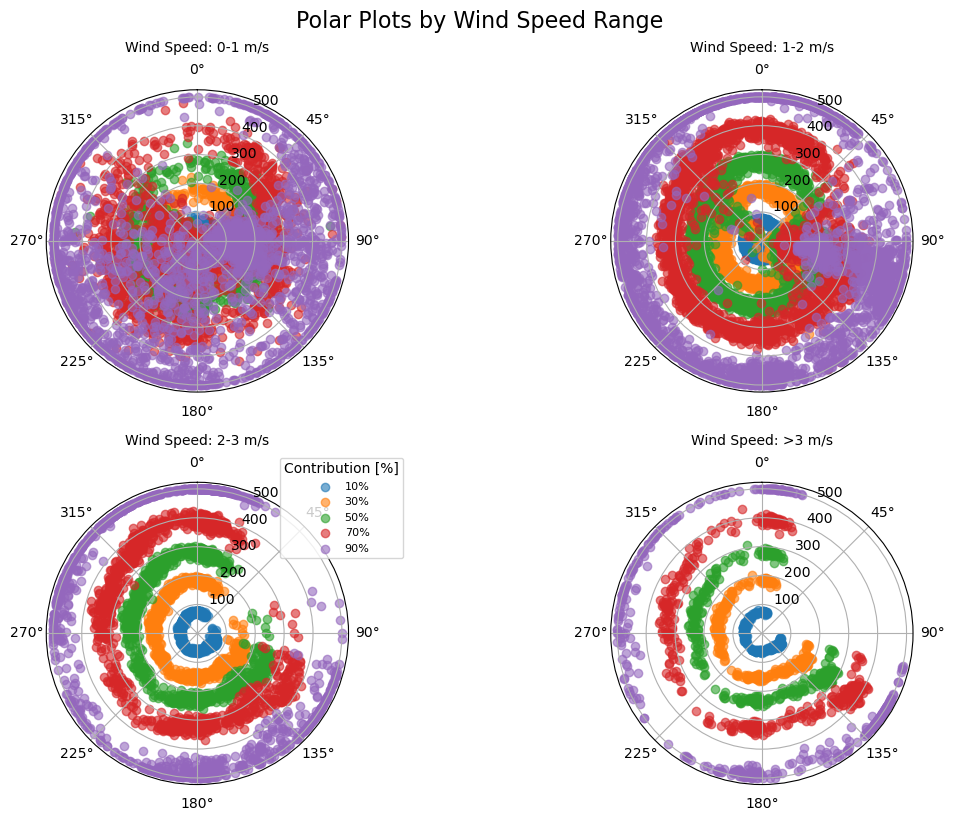

In [ ]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Define file path and read NetCDF files
file_dir = "/Users/bhupendra/projects/crocus/data/flux_data/data/netcdf/resnc/"
file_list = [os.path.join(root, f) for root, _, files in os.walk(file_dir) for f in files if f.endswith('.nc')]

# Function to process NetCDF files
def process_file(file):
    ds = xr.open_dataset(file)
    df = pd.DataFrame({
        "time": pd.to_datetime(ds["time"].values),  # Directly convert to datetime
        "wind_dir": ds["wind_dir"].values,
        "co2_flux": ds["co2_flux"].values,
        "x_peak": ds["x_peak"].values,
        "x_10": ds["x_10%"].values,
        "x_30": ds["x_30%"].values,
        "x_50": ds["x_50%"].values,
        "x_70": ds["x_70%"].values,
        "x_90": ds["x_90%"].values,
        "wind_speed": ds["wind_speed"].values,
    })
    ds.close()
    return df

# Read and combine all files into a single DataFrame
all_data = pd.concat([process_file(file) for file in file_list], ignore_index=True)

# Prepare data for polar plot
polar_data = all_data.melt(
    id_vars=["wind_dir", "wind_speed"],
    value_vars=["x_10", "x_30", "x_50", "x_70", "x_90"],
    var_name="x_var",
    value_name="y_val"
)

# Add wind speed categories
bins = [0, 1, 2, 3, np.inf]
labels = ["Wind Speed: 0-1 m/s", "Wind Speed: 1-2 m/s", "Wind Speed: 2-3 m/s", "Wind Speed: >3 m/s"]
polar_data["wind_speed_range"] = pd.cut(polar_data["wind_speed"], bins=bins, labels=labels, ordered=True)

# Map x_var to percentages
polar_data["x_var"] = polar_data["x_var"].replace({
    "x_10": "10", "x_30": "30", "x_50": "50", "x_70": "70", "x_90": "90"
})

# Get unique wind speed ranges for panels
wind_speed_ranges = polar_data["wind_speed_range"].cat.categories


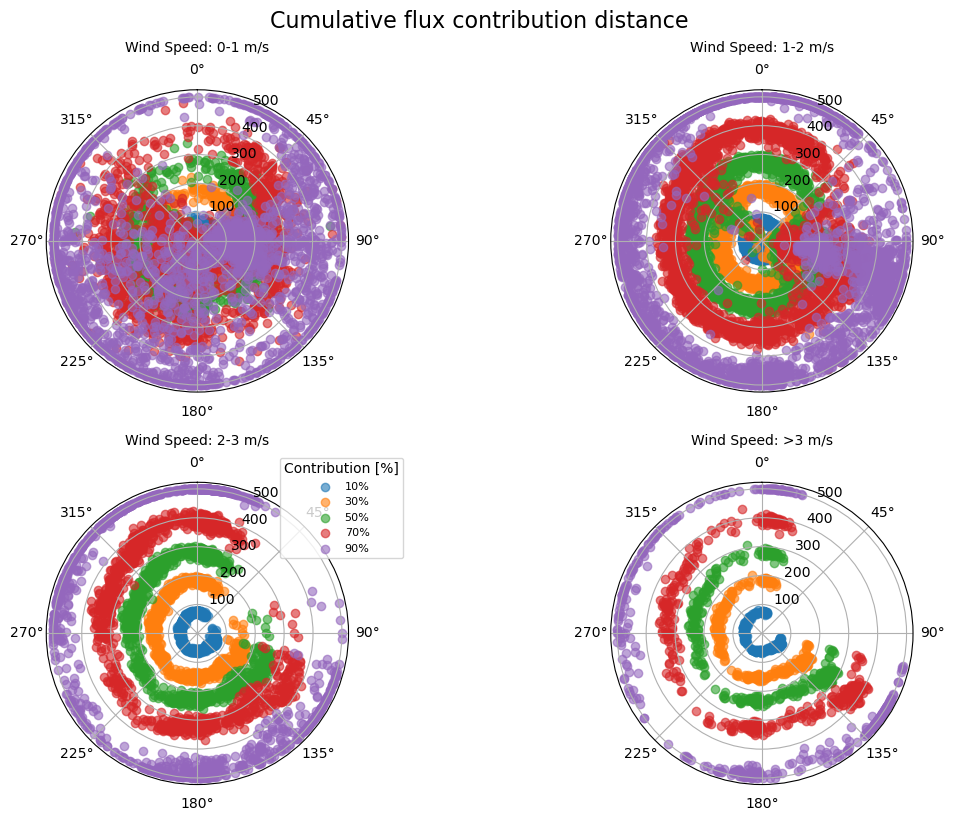

In [ ]:

# Create faceted polar plots
n_panels = len(wind_speed_ranges)
fig, axes = plt.subplots(
    nrows=(n_panels + 1) // 2, ncols=2, subplot_kw={"projection": "polar"}, figsize=(12, 8)
)
axes = axes.flatten()

# Ensure 0 degrees is at the top
for ax in axes:
    ax.set_theta_zero_location("N")
    ax.set_theta_direction(-1)  # Clockwise direction

for i, wind_speed_range in enumerate(wind_speed_ranges):
    ax = axes[i]
    data_subset = polar_data[polar_data["wind_speed_range"] == wind_speed_range]
    for x_var, grp in data_subset.groupby("x_var"):
        ax.scatter(
            np.radians(grp["wind_dir"]),
            np.minimum(grp["y_val"], 500),
            label=f"{x_var}%",
            alpha=0.6
        )
    ax.set_title(wind_speed_range, va="bottom", fontsize=10)
    if i == 2:  # Place a smaller legend on the first panel only
        ax.legend(loc="upper right", bbox_to_anchor=(1.2, 1.1), title="Contribution [%]", fontsize=8)

# Remove unused axes
for ax in axes[n_panels:]:
    fig.delaxes(ax)

plt.tight_layout()
plt.suptitle("Cumulative flux contribution distance", y=1.02, fontsize=16)
plt.show()
